In [1]:
#pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install xgboost

                                              0.0/70.9 MB ? eta -:--:--
                                              0.6/70.9 MB 12.6 MB/s eta 0:00:06
                                              1.0/70.9 MB 21.1 MB/s eta 0:00:04
     -                                        1.8/70.9 MB 14.4 MB/s eta 0:00:05
     -                                        2.1/70.9 MB 12.0 MB/s eta 0:00:06
     -                                        2.4/70.9 MB 10.9 MB/s eta 0:00:07
     -                                        2.6/70.9 MB 9.7 MB/s eta 0:00:08
     -                                        2.8/70.9 MB 8.9 MB/s eta 0:00:08
     -                                        3.0/70.9 MB 8.1 MB/s eta 0:00:09
     -                                        3.3/70.9 MB 8.1 MB/s eta 0:00:09
     -                                        3.5/70.9 MB 7.4 MB/s eta 0:00:10
     --                                       3.7/70.9 MB 7.1 MB/s eta 0:00:10
     --                                       3.8/70.9

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import cv2 as cv
import sklearn
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.datasets import load_files
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder as ohe
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.manifold import TSNE
from sklearn.svm import SVC
import xgboost as xgb
from keras.layers import Dense,BatchNormalization,Dropout,Conv2D,MaxPooling2D,Flatten,GlobalMaxPool2D
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.models import Sequential

In [9]:

alphabets = os.listdir(r"C:\Users\Acer pc\Downloads\Air-Canvas-project\archive")
main_list = []

for i in range(len(alphabets)):
    sub_list = []
    os.chdir(r'C:\Users\Acer pc\Downloads\Air-Canvas-project\archive\{}'.format(alphabets[i]))
    imgs = os.listdir()
    for j in imgs:
        img_path = os.path.join(os.getcwd(), j)  # Get the full image path
        img = cv.imread(img_path, -1).flatten()
        sub_list.append([img, alphabets[i]])
    main_list.append(sub_list)


In [11]:
alphabets

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [12]:
main_list

[[[array([0, 3, 0, ..., 2, 0, 0], dtype=uint8), 'A'],
  [array([0, 1, 0, ..., 0, 0, 0], dtype=uint8), 'A'],
  [array([0, 3, 2, ..., 1, 0, 0], dtype=uint8), 'A'],
  [array([6, 0, 0, ..., 0, 0, 0], dtype=uint8), 'A'],
  [array([2, 0, 8, ..., 0, 0, 0], dtype=uint8), 'A'],
  [array([0, 0, 8, ..., 0, 0, 0], dtype=uint8), 'A'],
  [array([3, 2, 0, ..., 0, 0, 0], dtype=uint8), 'A'],
  [array([7, 1, 2, ..., 0, 0, 0], dtype=uint8), 'A'],
  [array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), 'A'],
  [array([1, 1, 0, ..., 0, 0, 0], dtype=uint8), 'A'],
  [array([ 0,  0, 10, ...,  0,  0,  0], dtype=uint8), 'A'],
  [array([3, 0, 6, ..., 0, 0, 0], dtype=uint8), 'A'],
  [array([0, 0, 1, ..., 0, 0, 0], dtype=uint8), 'A'],
  [array([3, 0, 2, ..., 0, 0, 0], dtype=uint8), 'A'],
  [array([1, 0, 0, ..., 0, 0, 0], dtype=uint8), 'A'],
  [array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), 'A'],
  [array([ 0, 13,  0, ...,  0,  0,  0], dtype=uint8), 'A'],
  [array([10,  0,  6, ...,  0,  0,  0], dtype=uint8), 'A'],
  [array([

In [13]:
df_main_list = []
for i in range(26):
    df = pd.DataFrame(main_list[i])
    df_main_list.append(df)
df = pd.concat(df_main_list,axis=0,ignore_index=True)
df = pd.concat([df[0].apply(pd.Series),df[1]],axis=1,ignore_index=True) # Explode the lists
# shuffle all the  rows
df = df.sample(frac=1).reset_index(drop=True)

In [14]:
df

,0,1,2,3,4,5,6,7,8,9,...,1147,1148,1149,1150,1151,1152,1153,1154,1155,1156
0,0,0,8,0,6,4,6,0,0,1,...,0,0,0,0,0,0,0,0,0,M
1,0,0,0,4,0,0,9,4,1,5,...,0,0,0,0,0,0,0,0,0,F
2,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,V
3,3,0,7,136,255,173,0,6,3,0,...,255,254,255,255,255,254,212,0,0,E
4,0,0,0,1,1,2,2,2,9,5,...,9,1,0,2,1,0,3,0,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6826,2,0,0,5,0,0,8,0,2,5,...,0,0,0,0,0,0,0,0,0,M
6827,2,2,0,3,4,0,1,0,4,0,...,0,0,0,0,0,0,0,0,0,B
6828,0,9,3,0,0,15,0,10,0,0,...,0,0,0,0,0,0,0,0,0,L
6829,0,9,8,2,6,0,30,0,0,16,...,0,0,0,0,0,0,0,0,0,P


In [15]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1147,1148,1149,1150,1151,1152,1153,1154,1155,1156
0,0,0,8,0,6,4,6,0,0,1,...,0,0,0,0,0,0,0,0,0,M
1,0,0,0,4,0,0,9,4,1,5,...,0,0,0,0,0,0,0,0,0,F
2,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,V
3,3,0,7,136,255,173,0,6,3,0,...,255,254,255,255,255,254,212,0,0,E
4,0,0,0,1,1,2,2,2,9,5,...,9,1,0,2,1,0,3,0,0,S


In [16]:
Y = df.pop(1156)
x_train,x_test,y_train,y_test = train_test_split(df,Y,test_size=0.3,stratify=Y)

In [17]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,1146,1147,1148,1149,1150,1151,1152,1153,1154,1155
1355,0,7,9,0,8,15,7,0,53,249,...,3,1,2,5,5,1,0,1,0,0
1878,0,15,0,6,0,0,5,0,5,0,...,0,0,17,0,0,12,0,16,14,0
3279,0,3,0,20,0,4,0,5,0,5,...,0,0,0,0,0,0,0,0,0,0
1796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3159,0,0,8,13,0,8,0,9,8,0,...,4,13,0,3,90,246,255,80,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6378,8,4,9,0,0,97,248,255,141,0,...,0,1,6,0,179,255,52,1,0,0
4637,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
839,0,0,0,0,0,0,0,0,0,5,...,7,7,7,7,7,7,7,7,0,0
3434,4,0,16,0,5,4,1,8,2,6,...,18,33,0,11,0,11,11,0,0,0


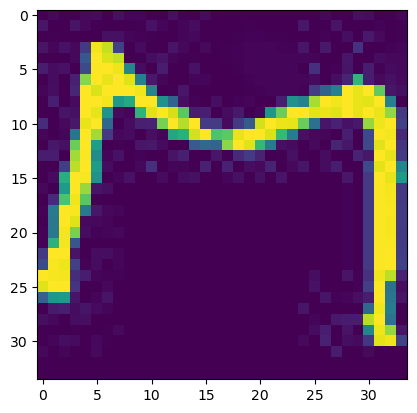

In [19]:
def show(image):
    """
    Pass the index number of the row/datapoint to view its plot
    """
    a = x_train.iloc[image].values.reshape(34,34)
    plt.imshow(a)
    plt.show()
show(122)

In [20]:
# Get basic info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6831 entries, 0 to 6830
Columns: 1156 entries, 0 to 1155
dtypes: uint8(1156)
memory usage: 7.5 MB


In [21]:
# number of datapoints available for each class
Y.value_counts()

A    391
N    350
P    336
C    297
O    292
F    284
L    282
D    274
B    272
X    272
S    263
M    261
Q    251
G    250
E    249
V    244
Z    240
R    239
U    237
W    237
H    229
J    227
T    226
K    217
Y    210
I    201
Name: 1156, dtype: int64

In [22]:
# Check whether there are any null/missing values.
print(f"The number of Null values in the dataframe : {df.isna().values.flatten().sum()}")

The number of Null values in the dataframe : 0


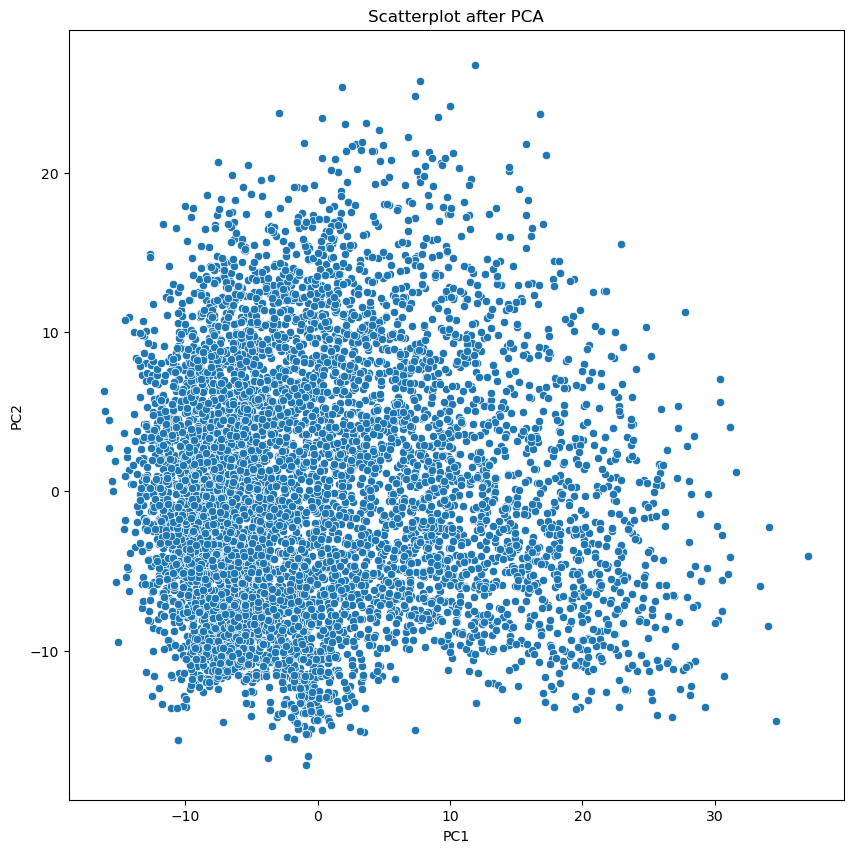

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming you have the dataset 'df' with only features and no labels

# Standardize the data
X_std = StandardScaler().fit_transform(df)

# Perform PCA
pca = PCA(n_components=2)
visual_data = pca.fit_transform(X_std)

# Create a DataFrame for visualization (optional)
visual_df = pd.DataFrame(data=visual_data, columns=['PC1', 'PC2'])

# Plot the scatter plot without hue (no labels)
plt.figure(figsize=(10, 10))
sns.scatterplot(x='PC1', y='PC2', data=visual_df)
plt.title("Scatterplot after PCA")
plt.show()
